In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
from zipfile import ZipFile
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop


In [3]:
ZipFile("/kaggle/input/dogs-vs-cats/train.zip","r").extractall()
ZipFile("/kaggle/input/dogs-vs-cats/test1.zip", "r").extractall()

In [4]:
train_dir = "./train/"
test_dir = "./test1/"

In [5]:
train_names = os.listdir(train_dir)
categories = []
for filename in train_names:
    category = filename.split(".")[0]
    if category == "dog":
        categories.append("dog")
    else:
        categories.append("cat")
df = pd.DataFrame({
    "filename" : train_names,
    "category" : categories
})

In [6]:
df.head()

,filename,category
0,cat.10430.jpg,cat
1,dog.3127.jpg,dog
2,dog.12079.jpg,dog
3,dog.9350.jpg,dog
4,cat.1901.jpg,cat


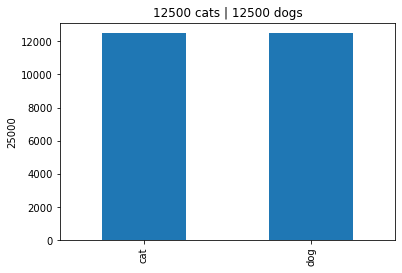

In [7]:
df.category.value_counts().plot.bar()
plt.title(str(len(df[df['category'] == 'cat']))+" cats" + " | " +str(len(df[df['category'] == 'dog']))+" dogs")
plt.ylabel(len(df))
plt.show()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

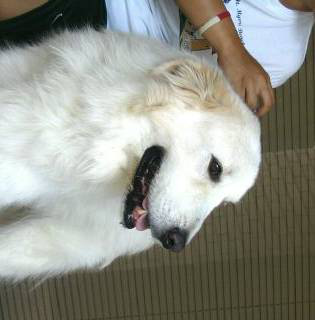

In [9]:
load_img(train_dir+random.choice(df.filename))

In [10]:
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [11]:
train_datagen = ImageDataGenerator(rotation_range=40,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=(120,120),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
    shuffle=True
)

Found 20000 validated image filenames belonging to 2 classes.


In [12]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=(120,120),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
    shuffle=True
)

Found 5000 validated image filenames belonging to 2 classes.


In [13]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Epoch 1/100
312/312 [==============================] - 118s 378ms/step - loss: 0.6803 - accuracy: 0.5918 - val_loss: 0.6873 - val_accuracy: 0.5146
Epoch 2/100
312/312 [==============================] - 118s 376ms/step - loss: 0.6363 - accuracy: 0.6471 - val_loss: 0.6143 - val_accuracy: 0.7114
Epoch 3/100
312/312 [==============================] - 117s 375ms/step - loss: 0.6102 - accuracy: 0.6715 - val_loss: 0.5295 - val_accuracy: 0.7340
Epoch 4/100
312/312 [==============================] - 116s 372ms/step - loss: 0.5881 - accuracy: 0.6902 - val_loss: 0.5388 - val_accuracy: 0.7294
Epoch 5/100
312/312 [==============================] - 116s 371ms/step - loss: 0.5726 - accuracy: 0.7023 - val_loss: 0.6008 - val_accuracy: 0.6724
Epoch 6/100
312/312 [==============================] - 116s 370ms/step - loss: 0.5598 - accuracy: 0.7163 - val_loss: 0.5486 - val_accuracy: 0.7416
Epoch 7/100
312/312 [==============================] - 116s 373ms/step - loss: 0.5442 - accuracy: 0.7276 - val_loss: 0

312/312 [==============================] - 117s 374ms/step - loss: 0.4176 - accuracy: 0.8126 - val_loss: 0.3709 - val_accuracy: 0.8338
Epoch 57/100
312/312 [==============================] - 117s 376ms/step - loss: 0.4108 - accuracy: 0.8156 - val_loss: 0.2860 - val_accuracy: 0.8814
Epoch 58/100
312/312 [==============================] - 117s 375ms/step - loss: 0.4118 - accuracy: 0.8160 - val_loss: 0.6613 - val_accuracy: 0.6754
Epoch 59/100
312/312 [==============================] - 116s 372ms/step - loss: 0.4147 - accuracy: 0.8149 - val_loss: 0.3631 - val_accuracy: 0.8624
Epoch 60/100
312/312 [==============================] - 118s 376ms/step - loss: 0.4086 - accuracy: 0.8194 - val_loss: 0.3179 - val_accuracy: 0.8772
Epoch 61/100
312/312 [==============================] - 116s 371ms/step - loss: 0.4113 - accuracy: 0.8198 - val_loss: 0.2860 - val_accuracy: 0.8846
Epoch 62/100
312/312 [==============================] - 118s 378ms/step - loss: 0.4136 - accuracy: 0.8134 - val_loss: 0.3799 

Text(0.5, 1.0, 'Training and validation loss')

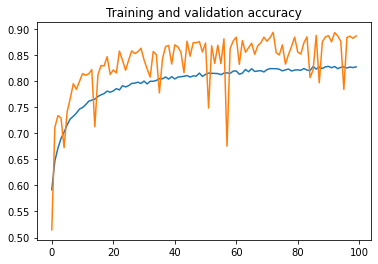

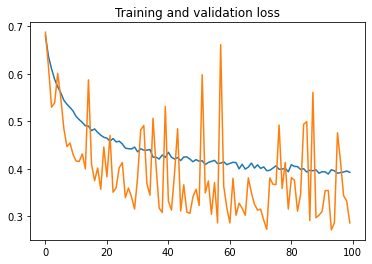

In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_df)/64,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validate_df)/64
)

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )